# Exercise: Derivatives

- by Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Load data

In [2]:
data = np.loadtxt("04b_Exercise_velocity_acceleration_data_file.dat")

In [3]:
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  15.25565932],
       [ 99.9       ,  15.33160759],
       [100.        ,  15.40808206]])

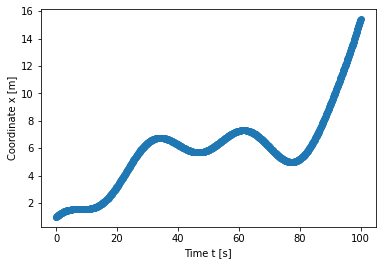

In [4]:
plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(data[:,0],data[:,1])

### Task

Calculate the velocity \\(v(t)=\dot{x}(t)\\) and the acceleration \\(a(t)=\ddot{x}(t)\\) for the loaded data set that describes a set of points \\((t_i,x_i)\\) for \\(i=0,\dots,1000\\).

1. Calculate \\(v_i\\) and \\(a_i\\) using the forward-differences, central-differences and Richardson methods
2. Determine the maximum value of the acceleration and the corresponding time.

Be careful, now we do not know the function \\(x(t)\\) but only its values for specific points. You have to define the functions for the derivativesa bit differently.

### Solution

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [58]:
x = data[:, 1]
t = data[:, 0]

In [69]:
# v calculation

# Forward difference
def vFor(x, t):
    v = np.zeros(len(x))
    for n in range(len(x) - 1):
        v[n] = (x[n+1] - x[n]) / (t[n+1] - t[n])
    return v

# Backward difference
def vBack(x, t):
    v = np.zeros(len(x))
    for n in range(1, len(x)):
        v[n] = (x[n] - x[n-1]) / (t[n] - t[n-1])
    return v

# Central difference
def vCent(x, t):
    v = np.zeros(len(x))
    for n in range(1, len(x) - 1):
        v[n] = (x[n+1] - x[n-1]) / (t[n+1] - t[n-1])
    return v

# Richardson method
def vRichardson(x, t):
    v = np.zeros(len(x))
    for n in range(2, len(x) - 2):
        v[n] = (x[n-2] - 8*x[n-1] + 8*x[n+1] - x[n+2]) / (12*(t[n+1] - t[n]))
    return v

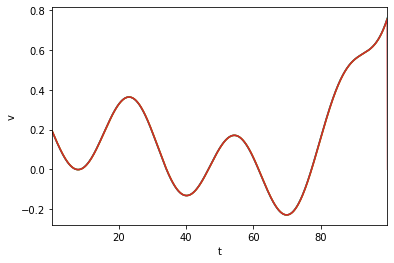

In [73]:
plt.xlabel('t')
plt.ylabel('v')
plt.xlim(t[3], t[-3])

plt.plot(t, vFor(x, t))
plt.plot(t, vBack(x, t))
plt.plot(t, vCent(x, t))
plt.plot(t, vRichardson(x, t))

- Double forward & double backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x+h)\right]-\left[f(x+h)-f(x)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}\\)

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x)-f(x-h)\right]-\left[f(x-h)-f(x-2h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x)-2f(x-h)+f(x-2h)}{h^2}\\)

- Forward and backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+h)-f(x)\right]-\left[f(x)-f(x-h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\)

- Double central (same result as forward and backward for \\(2h=g\\))

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x)\right]-\left[f(x)-f(x-2h)\right]}{(2h)^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}=\lim_{g\rightarrow 0}\frac{f(x+g)-2f(x)+f(x-g)}{g^2}\\)

Richardson: \\(f''(x)=\frac{1}{12h^2}\left[-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [87]:
# a calculation

# Forward difference
def aFor(x, t):
    a = np.zeros(len(x))
    for n in range(len(x) - 2):
        a[n] = (x[n+2] - 2*x[n+1] + x[n]) / (t[n+1] - t[n])**2
    return a

# Backward difference
def aBack(x, t):
    a = np.zeros(len(x))
    for n in range(2, len(x)):
        a[n] = (x[n] - 2*x[n-1] + x[n-2]) / (t[n] - t[n-1])**2
    return a

# Central difference
def aCent(x, t):
    a = np.zeros(len(x))
    for n in range(1, len(x) - 1):
        a[n] = (x[n+1] - 2*x[n] + x[n-1]) / (t[n+1] - t[n])**2
    return a

# Richardson method
def aRichardson(x, t):
    a = np.zeros(len(x))
    for n in range(2, len(x) - 2):
        a[n] = (-x[n-2] + 16*x[n-1] - 30*x[n] + 16*x[n+1] - x[n+2]) / (12*(t[n+1] - t[n])**2)
    return a

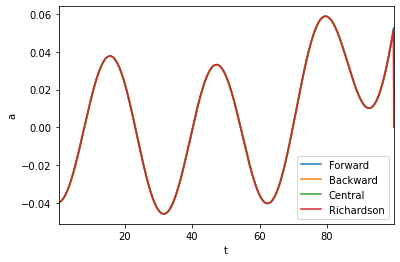

In [88]:
plt.xlabel('t')
plt.ylabel('a')
plt.xlim(t[3], t[-3])

plt.plot(t, aFor(x, t), label='Forward')
plt.plot(t, aBack(x, t), label='Backward')
plt.plot(t, aCent(x, t), label='Central')
plt.plot(t, aRichardson(x, t), label='Richardson')
plt.legend()

In [98]:
afor = aFor(x, t)
aback = aBack(x, t)
acent = aCent(x, t)
arich = aRichardson(x, t)

max_ind_a = np.argmax(arich)

print('Maximum a:', arich[max_ind_a])
print('at t:', t[max_ind_a])

Maximum a: 0.05889833615099504
at t: 79.60000000000001


array([0., 0., 0., ..., 0., 0., 0.])